In [22]:
import pandas as pd
df = pd.read_csv('DataFrame.csv') #Zeitreihen externe Variablen nur bis Mai 2024 daher filtern

In [23]:
df

,Datum,Merkmal,Merkmalwert,Bestätigte Menge,Relativer Anteil,USTR10Y,WeizenSpot,CornSpot,GER10Y,WtiOilSpot,SoySpot,AgriSpot
0,2014-01-01,B10,30,0,0.000000,3.006,197.738,187.924,1.941,98.04,246.732,200.399
1,2014-02-01,B10,30,0,0.000000,2.582,182.795,190.254,1.647,96.43,246.293,201.583
2,2014-03-01,B10,30,0,0.000000,2.608,204.039,200.847,1.563,104.92,269.561,221.079
3,2014-04-01,B10,30,48,0.125654,2.755,222.170,215.466,1.581,99.74,281.258,233.772
4,2014-05-01,B10,30,42,0.156134,2.613,241.438,212.924,1.470,99.42,242.195,236.510
...,...,...,...,...,...,...,...,...,...,...,...,...
17851,2023-10-01,P02,2078,0,0.000000,4.687,198.708,217.797,2.911,88.82,260.098,234.182
17852,2023-11-01,P02,2078,10,0.033333,4.761,196.365,214.936,2.758,81.04,263.268,234.431
17853,2023-12-01,P02,2078,1,0.003846,4.220,199.354,215.360,2.363,73.72,266.732,232.888
17854,2024-01-01,P02,2078,0,0.000000,3.866,206.624,210.593,2.029,71.89,256.195,228.351


In [ ]:
# Angenommen, df ist Ihr DataFrame
# Sicherstellen, dass 'Datum' im Datetime-Format vorliegt
df['Datum'] = pd.to_datetime(df['Datum'])

# Datum in Komponenten zerlegen
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month

# Zyklische Eigenschaften extrahieren
df['Monat_sin'] = np.sin(2 * np.pi * df['Monat'] / 12)
df['Monat_cos'] = np.cos(2 * np.pi * df['Monat'] / 12)

df = df[df["Datum"] < '2024-06-01']


df.tail(50)

In [25]:
df.to_csv('DataFrame_2.csv', index=False)


In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Angenommen, df ist Ihr DataFrame
# Sicherstellen, dass 'Datum' im Datetime-Format vorliegt
df['Datum'] = pd.to_datetime(df['Datum'])

# Datum in Komponenten zerlegen
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month

# Zyklische Eigenschaften extrahieren
df['Monat_sin'] = np.sin(2 * np.pi * df['Monat'] / 12)
df['Monat_cos'] = np.cos(2 * np.pi * df['Monat'] / 12)

# Features und Zielvariable definieren
features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']
X = df[features]

# Zielvariablen für die nächsten 12 Monate
y = pd.concat([df['Relativer Anteil'].shift(-i) for i in range(1, 13)], axis=1).dropna()

# Anpassung der Features, um die gleiche Anzahl an Zeilen wie y zu haben
X = X.iloc[:-12]

# Normalisieren der Daten
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [17844, 14013]

In [8]:
X

,Jahr,Monat_sin,Monat_cos,USTR10Y,WeizenSpot,CornSpot,GER10Y,WtiOilSpot,SoySpot,AgriSpot
0,2014,5.000000e-01,8.660254e-01,3.006,197.738,187.924,1.941,98.04,246.732,200.399
1,2014,8.660254e-01,5.000000e-01,2.582,182.795,190.254,1.647,96.43,246.293,201.583
2,2014,1.000000e+00,6.123234e-17,2.608,204.039,200.847,1.563,104.92,269.561,221.079
3,2014,8.660254e-01,-5.000000e-01,2.755,222.170,215.466,1.581,99.74,281.258,233.772
4,2014,5.000000e-01,-8.660254e-01,2.613,241.438,212.924,1.470,99.42,242.195,236.510
...,...,...,...,...,...,...,...,...,...,...
17851,2023,-8.660254e-01,5.000000e-01,4.687,198.708,217.797,2.911,88.82,260.098,234.182
17852,2023,-5.000000e-01,8.660254e-01,4.761,196.365,214.936,2.758,81.04,263.268,234.431
17853,2023,-2.449294e-16,1.000000e+00,4.220,199.354,215.360,2.363,73.72,266.732,232.888
17854,2024,5.000000e-01,8.660254e-01,3.866,206.624,210.593,2.029,71.89,256.195,228.351


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# FNN-Modell definieren
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(12, activation='linear'))  # 12 Ausgabewerte für die nächsten 12 Monate

model.compile(optimizer='adam', loss='mean_squared_error')


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
# Modell trainieren
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)


Epoch 1/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 645us/step - loss: nan - val_loss: nan
Epoch 2/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 546us/step - loss: nan - val_loss: nan
Epoch 3/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 558us/step - loss: nan - val_loss: nan
Epoch 4/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - loss: nan - val_loss: nan
Epoch 5/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - loss: nan - val_loss: nan
Epoch 6/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - loss: nan - val_loss: nan
Epoch 7/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - loss: nan - val_loss: nan
Epoch 8/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 581us/step - loss: nan - val_loss: nan
Epoch 9/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - loss: nan - val_loss: nan
Epoch 10/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 683us/step - loss: nan - val_loss: nan
Epoch 11/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - loss: nan - val_loss: nan
Epoch 12/100
1143/1143 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - los

KeyboardInterrupt: 

In [ ]:
# Modell evaluieren
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')


In [ ]:
# Vorhersagen machen
predictions = model.predict(X_test)

# Vorhersagen zurückskalieren
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Ergebnisse anzeigen
results = pd.DataFrame({
    'Actual_1': y_test_rescaled[:, 0], 'Predicted_1': predictions_rescaled[:, 0],
    'Actual_2': y_test_rescaled[:, 1], 'Predicted_2': predictions_rescaled[:, 1],
    'Actual_3': y_test_rescaled[:, 2], 'Predicted_3': predictions_rescaled[:, 2],
    # Fügen Sie weitere Monate hinzu, wenn nötig
})

print(results.head())


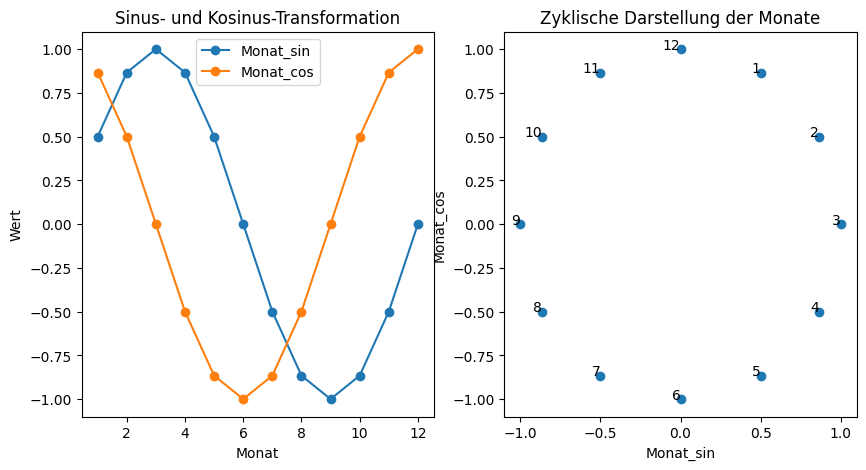

In [4]:
import numpy as np
import matplotlib.pyplot as plt

months = np.arange(1, 13)
month_sin = np.sin(2 * np.pi * months / 12)
month_cos = np.cos(2 * np.pi * months / 12)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(months, month_sin, 'o-', label='Monat_sin')
plt.plot(months, month_cos, 'o-', label='Monat_cos')
plt.xlabel('Monat')
plt.ylabel('Wert')
plt.title('Sinus- und Kosinus-Transformation')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(month_sin, month_cos)
for month in months:
    plt.text(np.sin(2 * np.pi * month / 12), np.cos(2 * np.pi * month / 12), str(month), ha='right')
plt.xlabel('Monat_sin')
plt.ylabel('Monat_cos')
plt.title('Zyklische Darstellung der Monate')

plt.show()


In [14]:
# LSTM_Model.ipynb

# Zellen einzeln ausführen, um den gesamten Prozess zu durchlaufen.

# Schritt 1: Importieren der benötigten Bibliotheken
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Schritt 2: Daten laden und vorbereiten
# CSV-Datei laden
df = pd.read_csv('DataFrame.csv')

# Sicherstellen, dass 'Datum' im Datetime-Format vorliegt
df['Datum'] = pd.to_datetime(df['Datum'])

# Datum in Komponenten zerlegen
df['Jahr'] = df['Datum'].dt.year
df['Monat'] = df['Datum'].dt.month

# Zyklische Eigenschaften extrahieren
df['Monat_sin'] = np.sin(2 * np.pi * df['Monat'] / 12)
df['Monat_cos'] = np.cos(2 * np.pi * df['Monat'] / 12)

# Features und Zielvariable definieren
features = ['Jahr', 'Monat_sin', 'Monat_cos', 'USTR10Y', 'WeizenSpot', 'CornSpot', 'GER10Y', 'WtiOilSpot', 'SoySpot', 'AgriSpot']
X = df[features]

# Zielvariablen für die nächsten 12 Monate
y = pd.concat([df['Relativer Anteil'].shift(-i) for i in range(1, 13)], axis=1).dropna()
y.columns = [f'R_A_{i+1}' for i in range(12)]

# Anpassung der Features, um die gleiche Anzahl an Zeilen wie y zu haben
X = X.iloc[:len(y)]

# Überprüfen auf NaN- oder unendliche Werte
print("NaN values in X:", X.isna().sum().sum())
print("NaN values in y:", y.isna().sum().sum())
print("Inf values in X:", np.isinf(X).sum().sum())
print("Inf values in y:", np.isinf(y).sum().sum())

# Anzeigen der spezifischen NaN-Werte in bestimmten Spalten (Beispiel für eine Spalte)
column_with_nans = 'USTR10Y'  # Ersetzen Sie dies durch die Spalte, die Sie untersuchen möchten
print(f"NaN-Werte in der Spalte {column_with_nans}:")
print(X[X[column_with_nans].isna()])


# Normalisieren der Daten
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Umformen der Daten für das LSTM-Modell
n_features = X_train.shape[1]
X_train = X_train.reshape((X_train.shape[0], 1, n_features))
X_test = X_test.reshape((X_test.shape[0], 1, n_features))

# Schritt 3: LSTM-Modell erstellen
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, n_features)))
model.add(Dense(12))  # 12 Ausgabewerte für die nächsten 12 Monate

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Schritt 4: Modell trainieren
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Schritt 5: Modell evaluieren und Vorhersagen machen
# Modell evaluieren
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Vorhersagen machen
predictions = model.predict(X_test)

# Vorhersagen zurückskalieren
predictions_rescaled = scaler_y.inverse_transform(predictions)
y_test_rescaled = scaler_y.inverse_transform(y_test)

# Ergebnisse anzeigen
results = pd.DataFrame(predictions_rescaled, columns=[f'Predicted_{i+1}' for i in range(12)])
actuals = pd.DataFrame(y_test_rescaled, columns=[f'Actual_{i+1}' for i in range(12)])

results_combined = pd.concat([results, actuals], axis=1)
print(results_combined.head())

# Schritt 6: Visualisierung der Verlaufsdaten des Trainings
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


NaN values in X: 1498
NaN values in y: 0
Inf values in X: 0
Inf values in y: 0
NaN-Werte in der Spalte USTR10Y:
       Jahr     Monat_sin     Monat_cos  USTR10Y  WeizenSpot  CornSpot  \
913    2024  1.224647e-16 -1.000000e+00      NaN         NaN       NaN   
914    2024 -5.000000e-01 -8.660254e-01      NaN         NaN       NaN   
982    2024  1.224647e-16 -1.000000e+00      NaN         NaN       NaN   
983    2024 -5.000000e-01 -8.660254e-01      NaN         NaN       NaN   
1035   2024  1.224647e-16 -1.000000e+00      NaN         NaN       NaN   
...     ...           ...           ...      ...         ...       ...   
11812  2024 -5.000000e-01 -8.660254e-01      NaN         NaN       NaN   
11864  2024  1.224647e-16 -1.000000e+00      NaN         NaN       NaN   
11865  2024 -5.000000e-01 -8.660254e-01      NaN         NaN       NaN   
11866  2024 -8.660254e-01 -5.000000e-01      NaN         NaN       NaN   
11867  2024 -1.000000e+00 -1.836970e-16      NaN         NaN       NaN   


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


897/897 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: nan - val_loss: nan
Epoch 2/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 3/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - loss: nan - val_loss: nan
Epoch 4/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - loss: nan - val_loss: nan
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step - loss: nan - val_loss: nan
Epoch 6/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 844us/step - loss: nan - val_loss: nan
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - loss: nan - val_loss: nan
Epoch 8/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 859us/step - loss: nan - val_loss: nan
Epoch 9/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step - loss: nan - val_loss: nan
Epoch 10/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 829us/step - loss: nan - val_loss: nan
Epoch 11/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: nan - val_loss: nan
Epoch 12/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - loss: nan - val_loss: nan
Epoch 13/100
897/89

KeyboardInterrupt: 